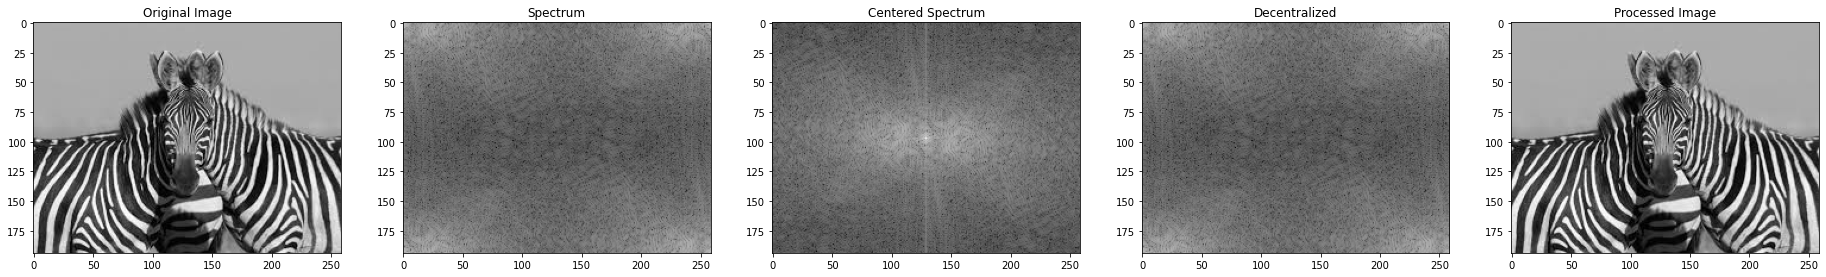

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread("zebra.jpeg", 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

(<matplotlib.image.AxesImage at 0x7f59415c2e10>,
 Text(0.5, 1.0, 'Original Image'))

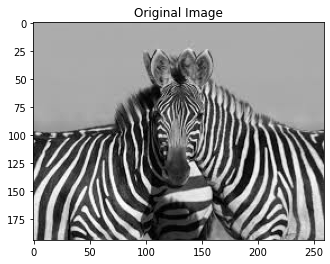

In [4]:
img_c1 = cv2.imread("zebra.jpeg", 0)
plt.imshow(img_c1, "gray"), plt.title("Original Image")

(<matplotlib.image.AxesImage at 0x7f5940344630>, Text(0.5, 1.0, 'Spectrum'))

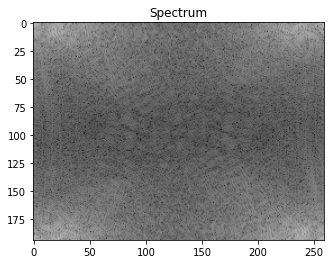

In [5]:
img_c2 = np.fft.fft2(img_c1)
plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")


(<matplotlib.image.AxesImage at 0x7f59403249b0>,
 Text(0.5, 1.0, 'Centered Spectrum'))

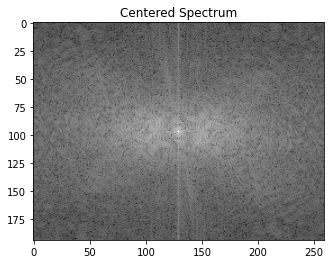

In [6]:
img_c3 = np.fft.fftshift(img_c2)
plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")


(<matplotlib.image.AxesImage at 0x7f59402cd630>,
 Text(0.5, 1.0, 'Decentralized'))

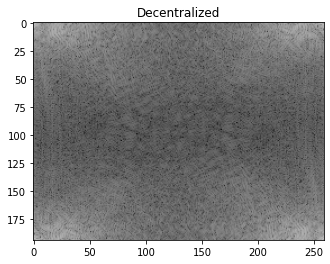

In [8]:
img_c4 = np.fft.ifftshift(img_c3)
plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")

(<matplotlib.image.AxesImage at 0x7f5942afa4e0>,
 Text(0.5, 1.0, 'Processed Image'))

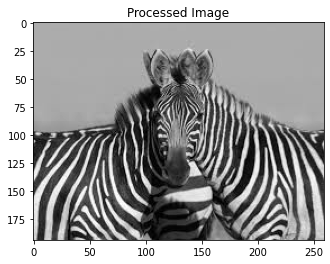

In [9]:
img_c5 = np.fft.ifft2(img_c4)
plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")


In [16]:
## Gaussian Filters

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

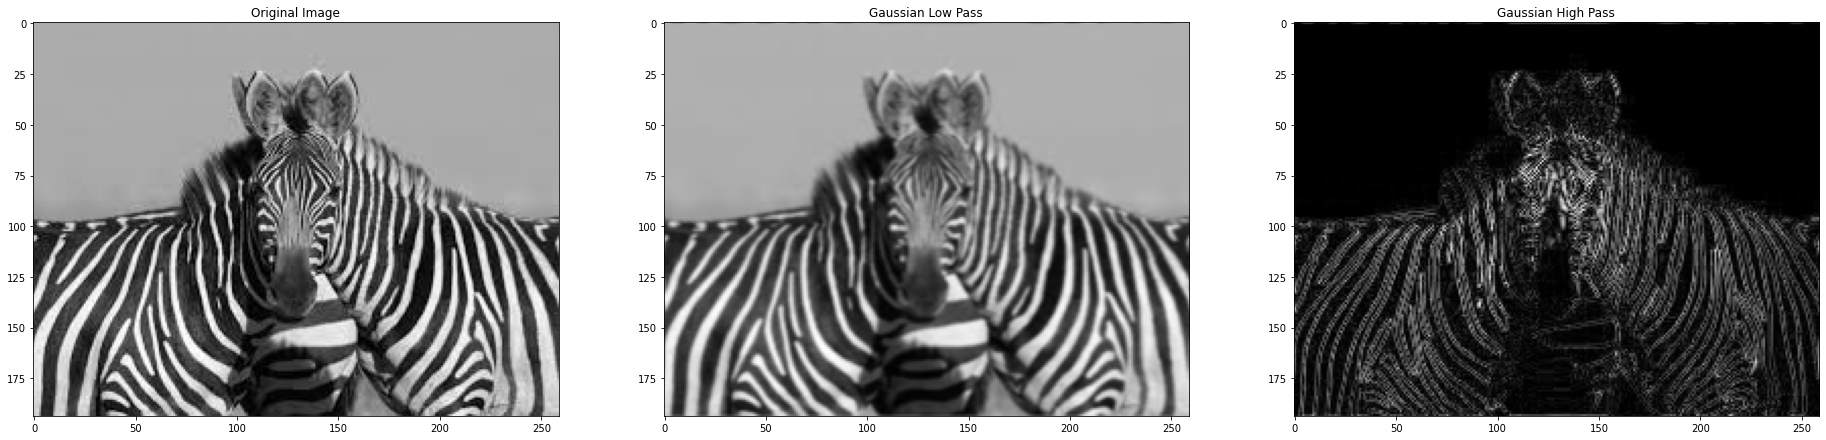

In [17]:
img = cv2.imread("zebra.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()